# Linear Regression

**Let us import the necessary libraries and read the data.**

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data)

In [7]:
bos.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [8]:
bos.columns = boston.feature_names
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['Price'] = boston.target
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [11]:
bos['Price'].plot()

In [12]:
bos['Price'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Price, dtype: float64

In [13]:
## Outlier calculation , Q3+1.5IQR and Q1 + 1.5IQR 
Upper_limit = 25 + 1.5 * (25-17)
Lower_limit = 17 - 1.5 * (25-17)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 37.0
Lower_limit : 5.0


In [14]:
df1 = bos[bos['Price']>37]
print(df1.shape)
df2 = bos[bos['Price']<5]
df2.shape

(37, 14)


(0, 14)

In [15]:
bos.shape

(506, 14)

Out of 506, 37 are outliers, Lets think a bit. These are outliers on the basis of price so there can be chances that the house is much far away from the main city but still its price is high.
Now we have to think that if we are dopping this values then for that odd place we wont be able to predict the high rate of prices.
So, lets consider and consider it and build our model.

In [16]:
## Raw linear regression model
X = bos.drop('Price', axis=1)
y= bos['Price']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept: 36.459488385089855
R^2 score: 0.7406426641094095


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(152,)


In [18]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7103879080674731
R^2 score for test: 0.7836295385076306


## Assumptions For linear Regression

In [19]:
## Raw OLS Model

In [20]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          6.72e-135
Time:                        22:35:47   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
import numpy as np
k=np.log(y)
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(k,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          4.07e-157
Time:                        22:35:47   Log-Likelihood:                 129.61
No. Observations:                 506   AIC:                            -231.2
Df Residuals:                     492   BIC:                            -172.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1020      0.204     20.081      0.000       3.701       4.503
CRIM          -0.0103      0.001     -7.808      0.000      -0.013      -0.008
ZN             0.0012      0.001      2.134      0.033    9.29e-05       0.002
INDUS          0.0025      0.002      1.002      0.317      -0.002       0.007
CHAS           0.1009      0.034      2.925      0.004       0.033       0.169
NOX           -0.7784      0.153     -5.091      0.000      -1.079      -0.478
RM             0.0908      0.017      5.430      0.000       0.058       0.124
AGE            0.0002      0.001      0.398      0.691      -0.001       0.001
DIS           -0.0491      0.008     -6.149      0.000      -0.065      -0.033
RAD            0.0143      0.003      5.373      0.000       0.009       0.019
TAX           -0.0006      0.000     -4.157      0.000      -0.001      -0.000
PTRATIO       -0.0383      0.005     -7.309      0.000      -0.049      -0.028
B              0.0004      0.000      3.847      0.000       0.000       0.001
LSTAT         -0.0290      0.002    -14.304      0.000      -0.033      -0.025
==============================================================================
Omnibus:                       59.863   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.459
Skew:                           0.466   Prob(JB):                     4.06e-50
Kurtosis:                       6.150   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Assumption 1- No autocorrelation

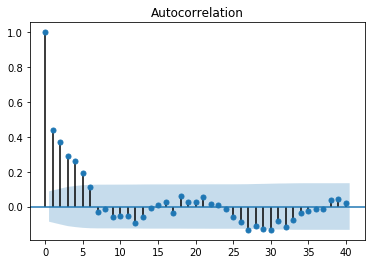

In [22]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

##### Assumption 2- Normality of Residuals

In [23]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(227.45853174338575, 0.0)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected.

In this case the computed value of the JB statistic 783.13 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

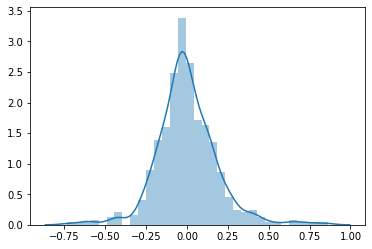

In [24]:
import seaborn as sns

sns.distplot(lin_reg.resid)

##### Asssumption 3 - Linearity of residuals
Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals.
OR
We can go for rainbow test. Let's look both of them one by one.

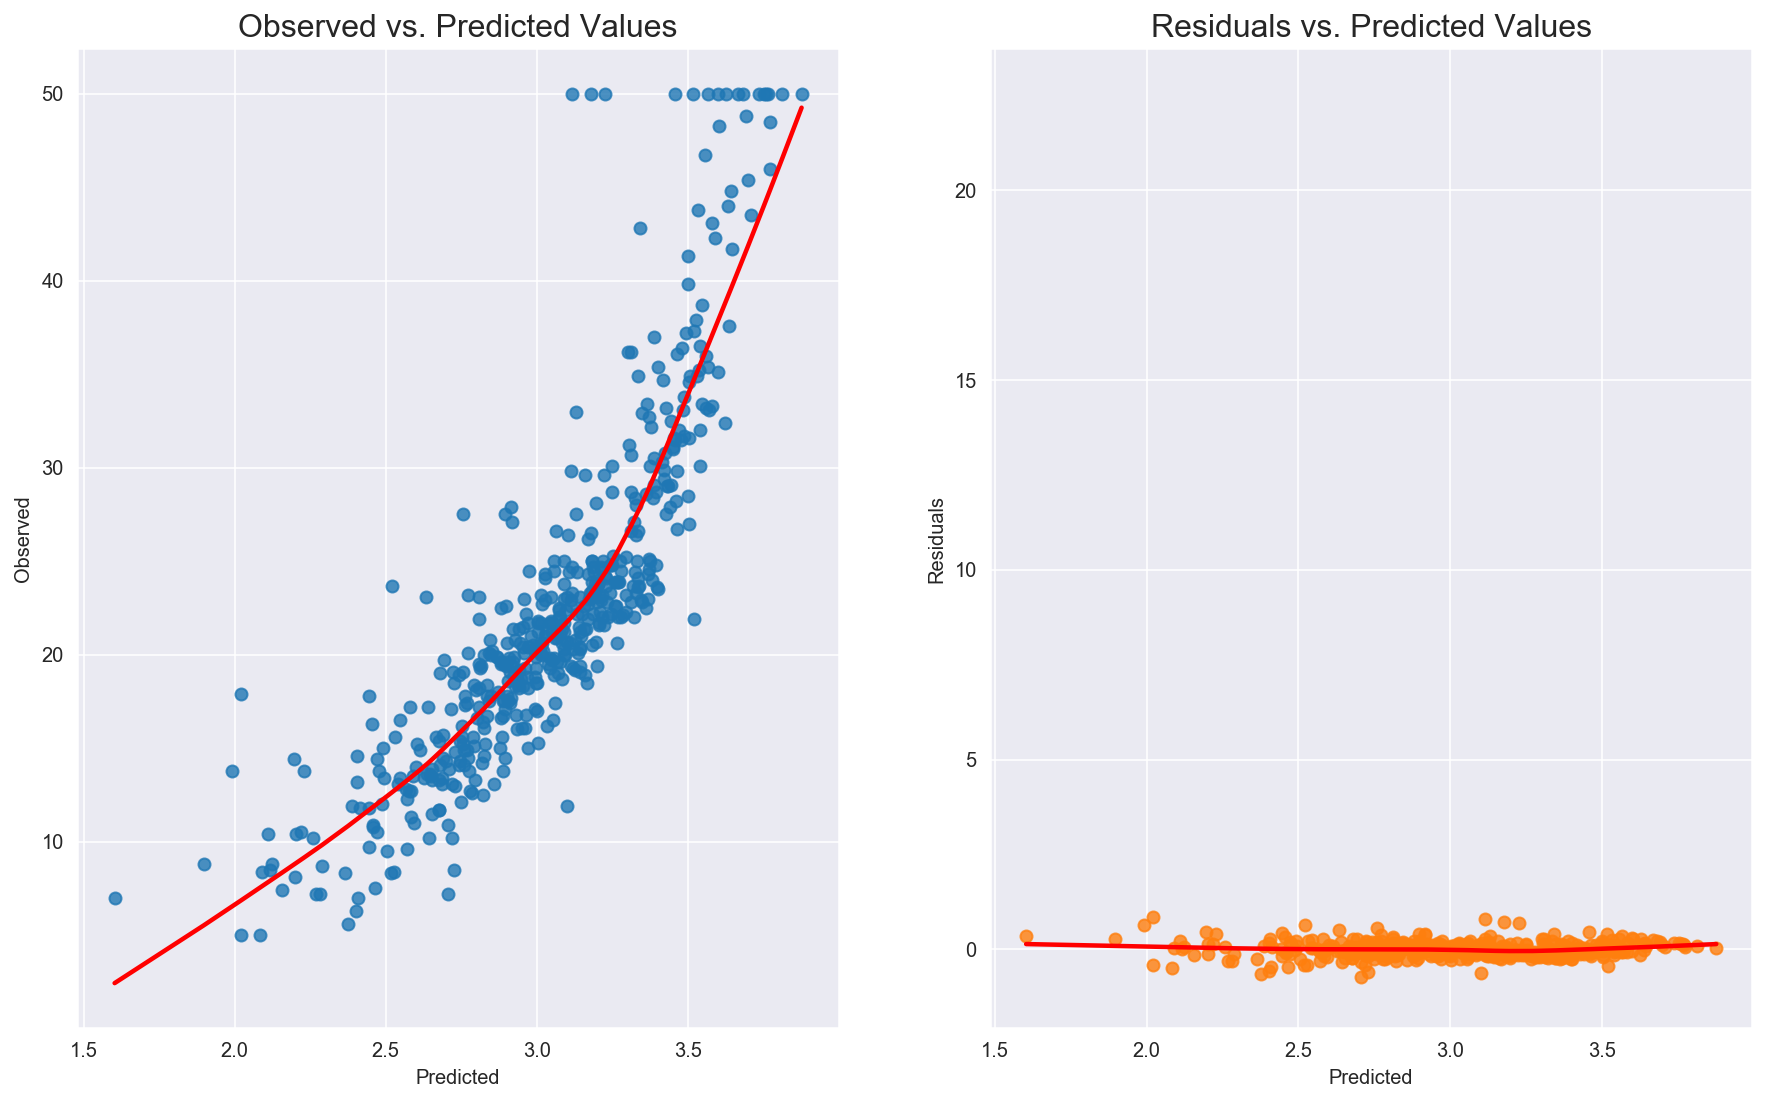

In [25]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

#### Rainbow test 

In [26]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.4797168125065145, 0.0011363957082387564)

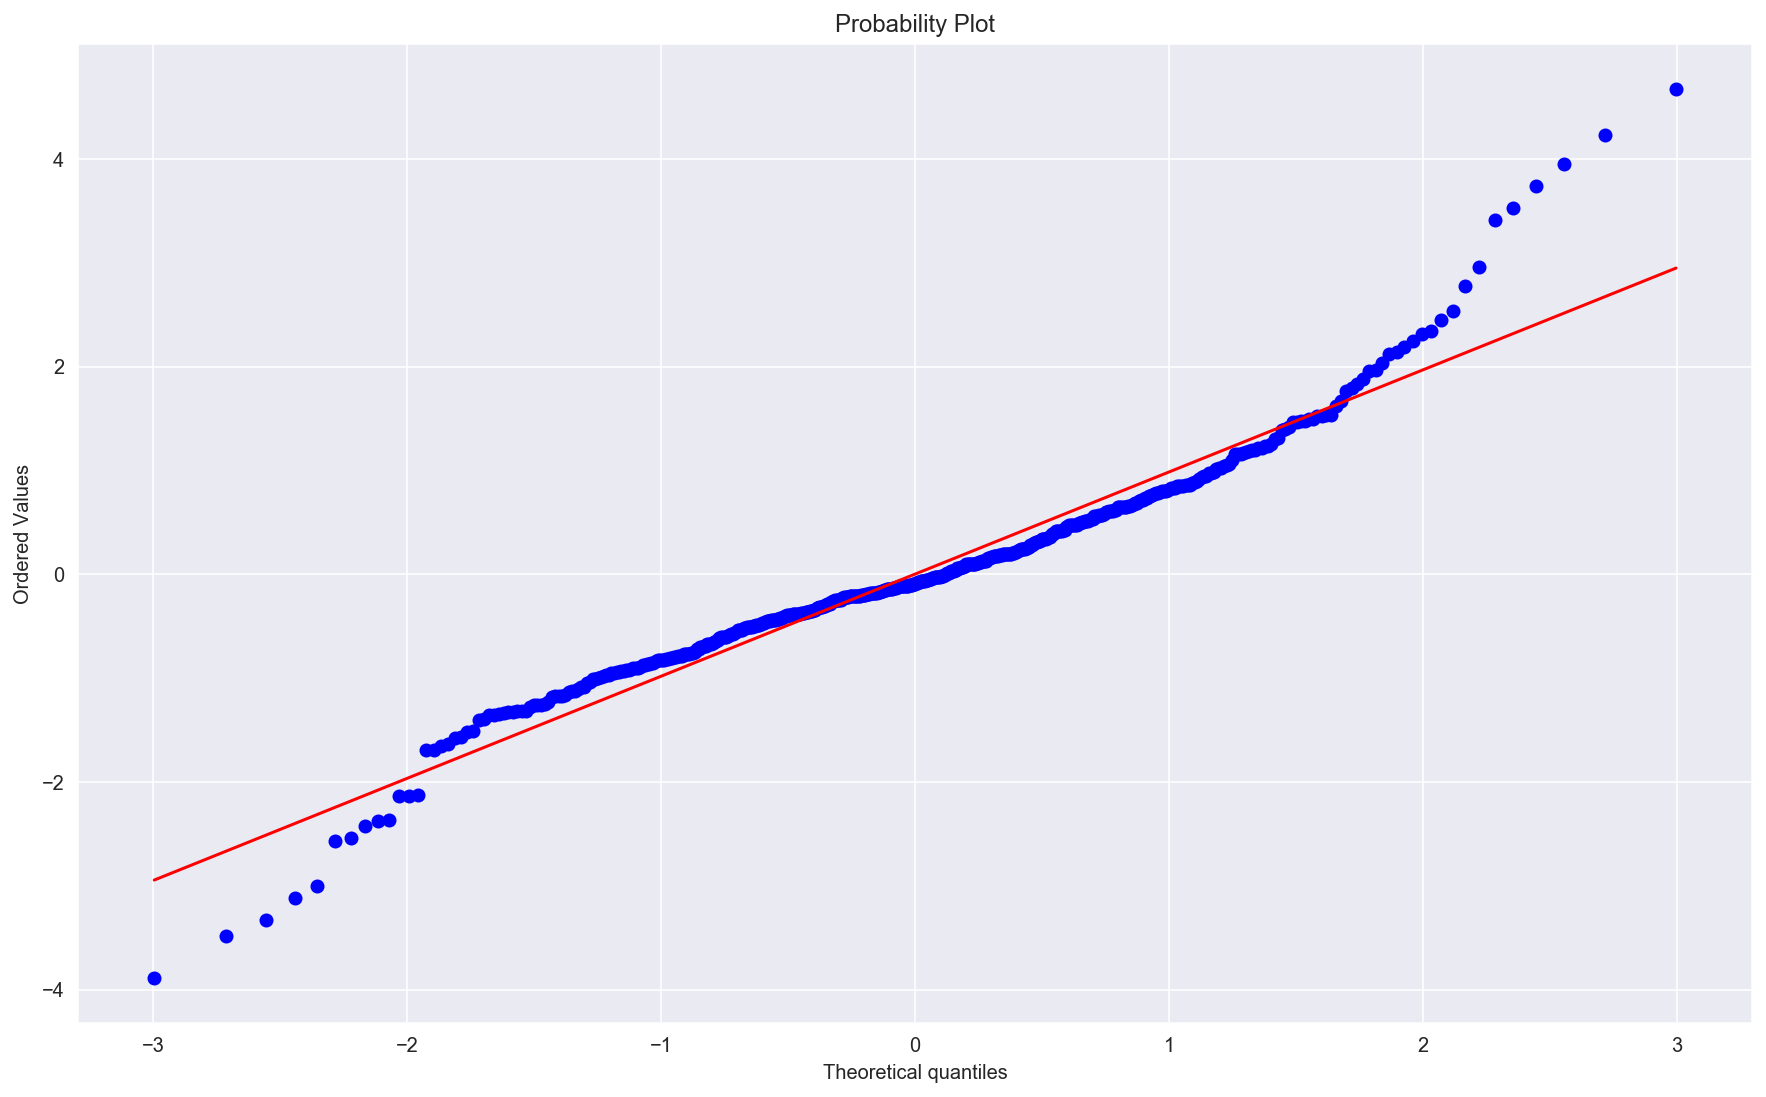

In [27]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

    EXPECTATION : THE MEAN VALUE OF THE RESIDUALS SHOULD BE ZERO.
    LET's CHECK

In [28]:
lin_reg.resid.mean()

-1.181312404067558e-15

Very much close to zero. 6.39 * 10^(-13)

So, linearity is present.

##### Assumption 4 -  Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Homoscedacity :: If the residuals are symmetrically distributed across the trend , then it is called as homoscedacious.
Heteroscedacity :: If the residuals are not symmetric across the trend, then it is called as heteroscedacious. In this the residuals can form an arrow shape or any other non symmetrical shape.

##### Goldfeld Test

[('F statistic', 3.611316205795245), ('p-value', 3.8683950116992902e-22)]

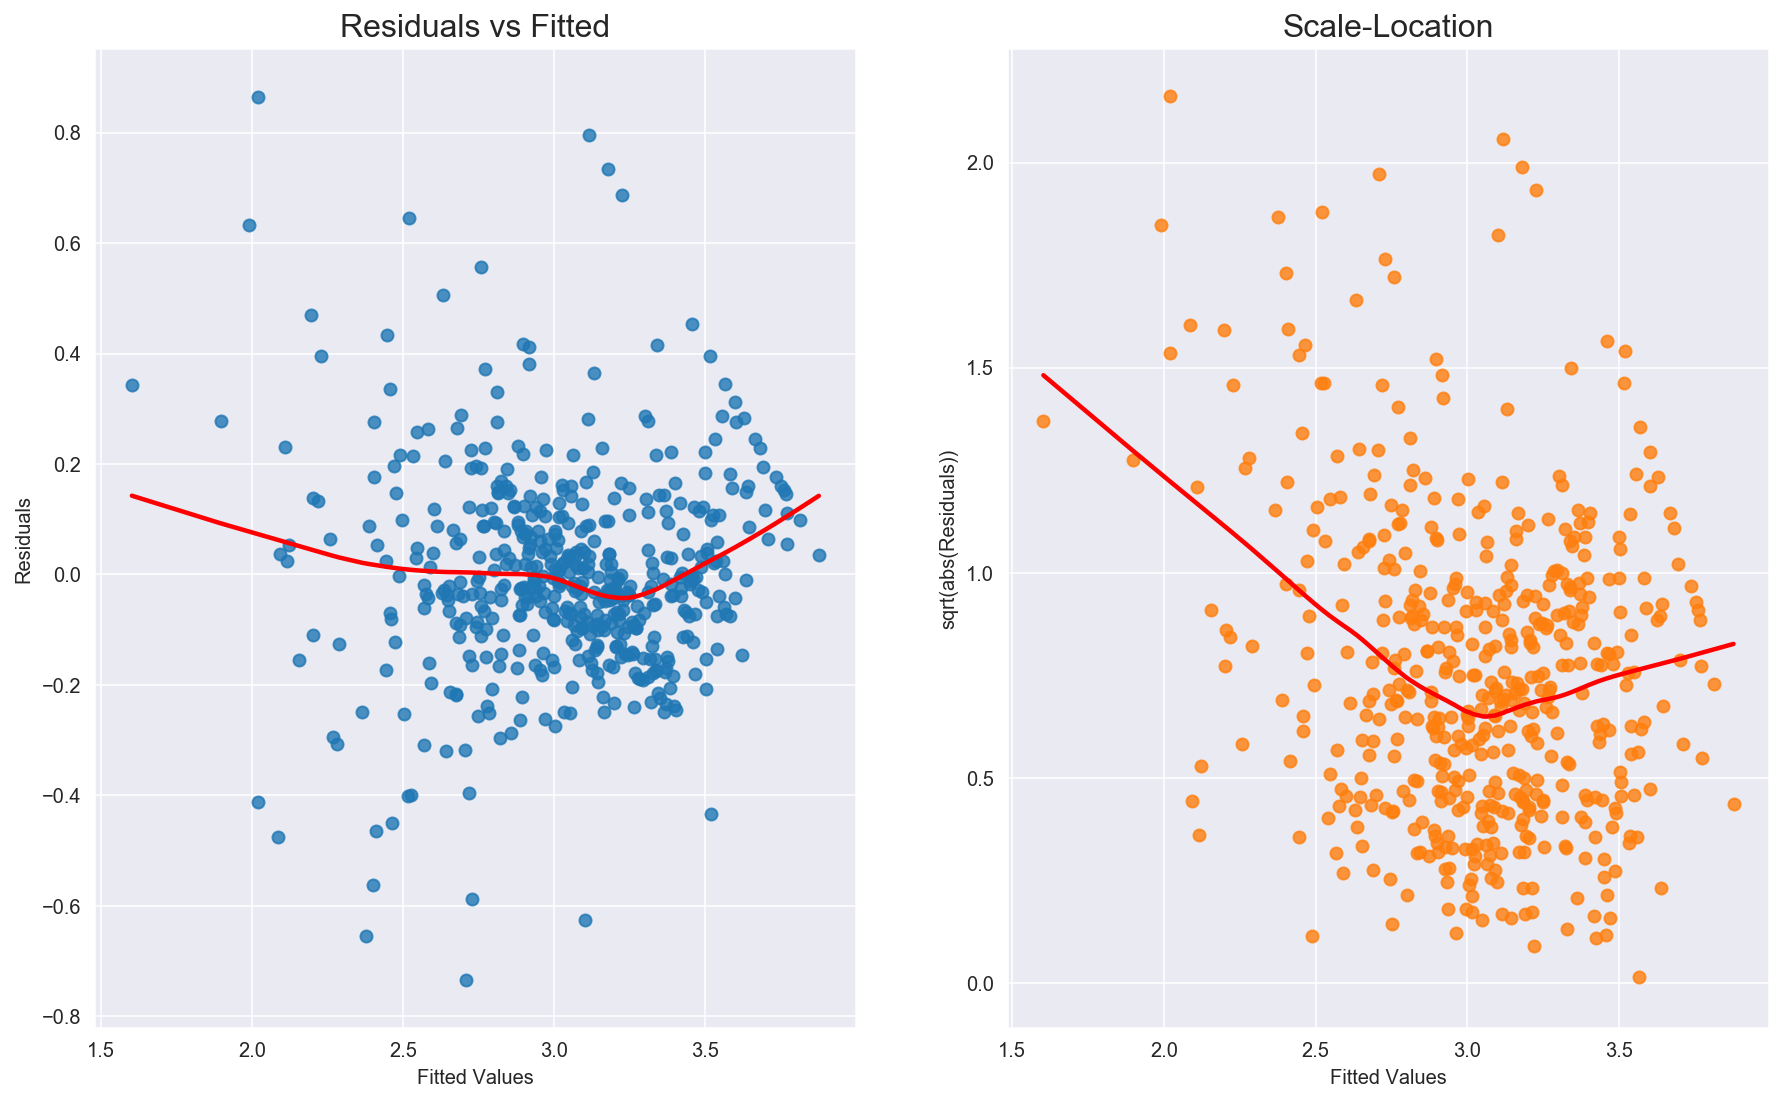

In [29]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

##### Assumption 5- NO  MULTI COLLINEARITY

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.792192,2.298758,3.991596,1.073995,4.39372,1.933744,3.100826,3.955945,7.484496,9.008554,1.799084,1.348521,2.941491


So, multicollinearity exists.

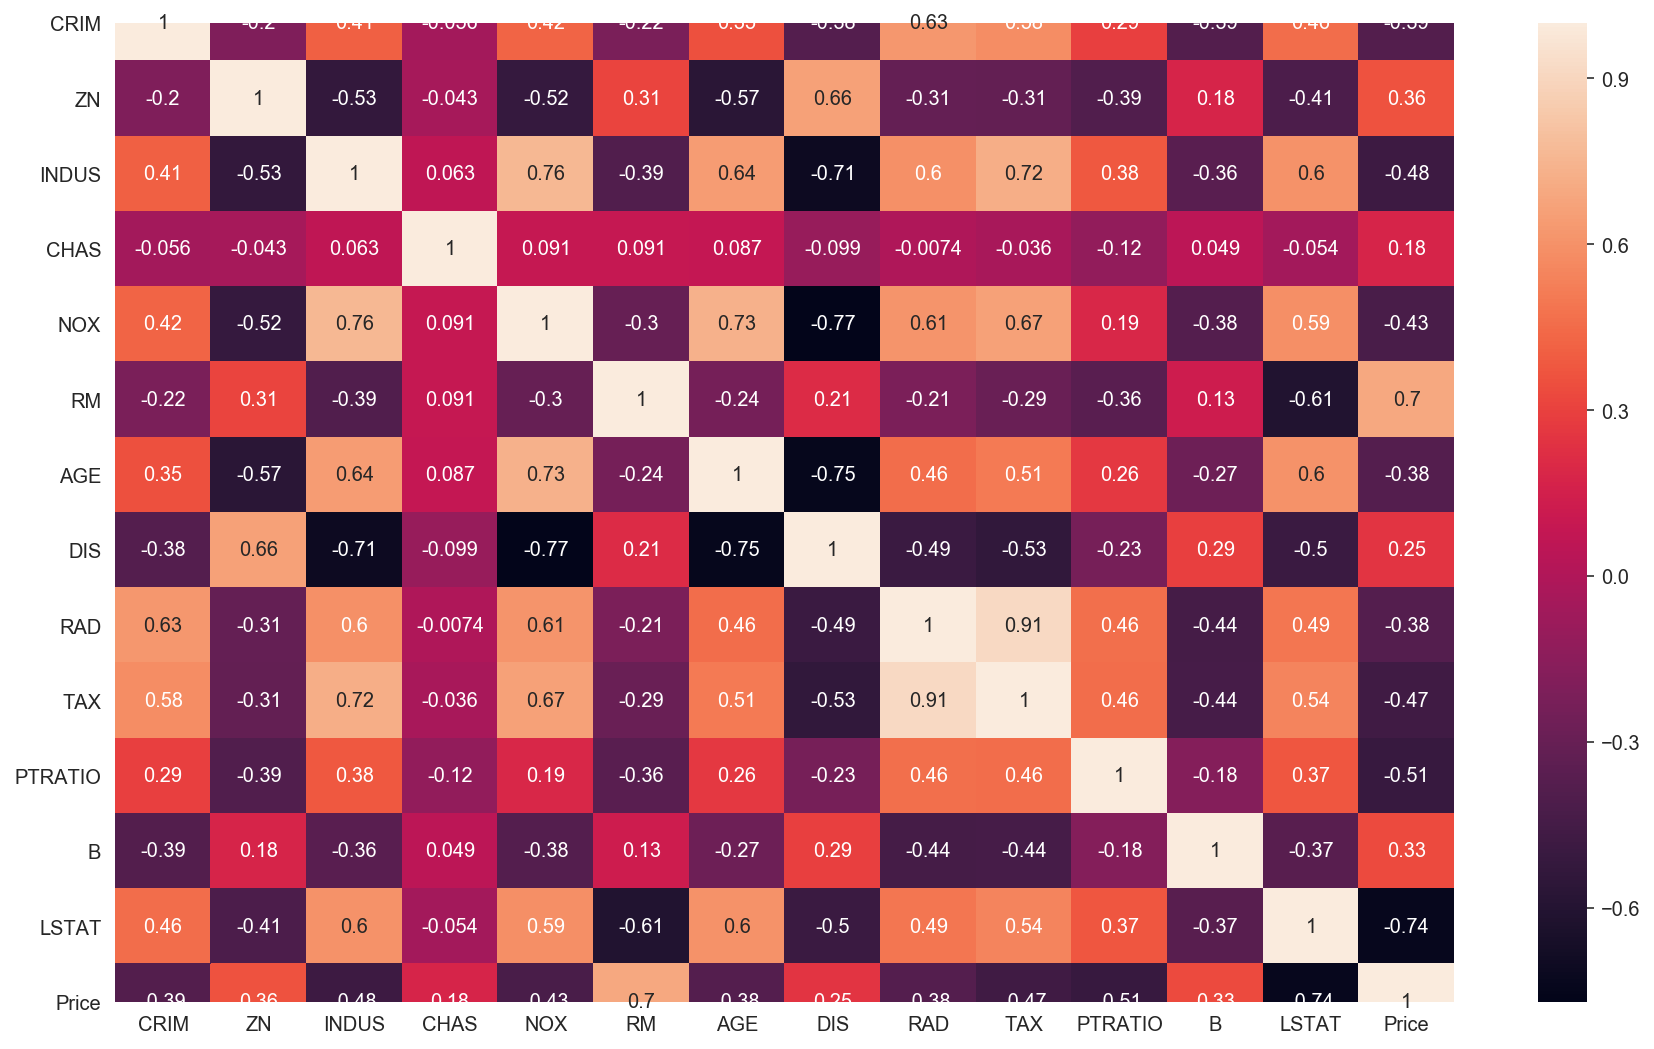

In [31]:
sns.heatmap(bos.corr(), annot=True)

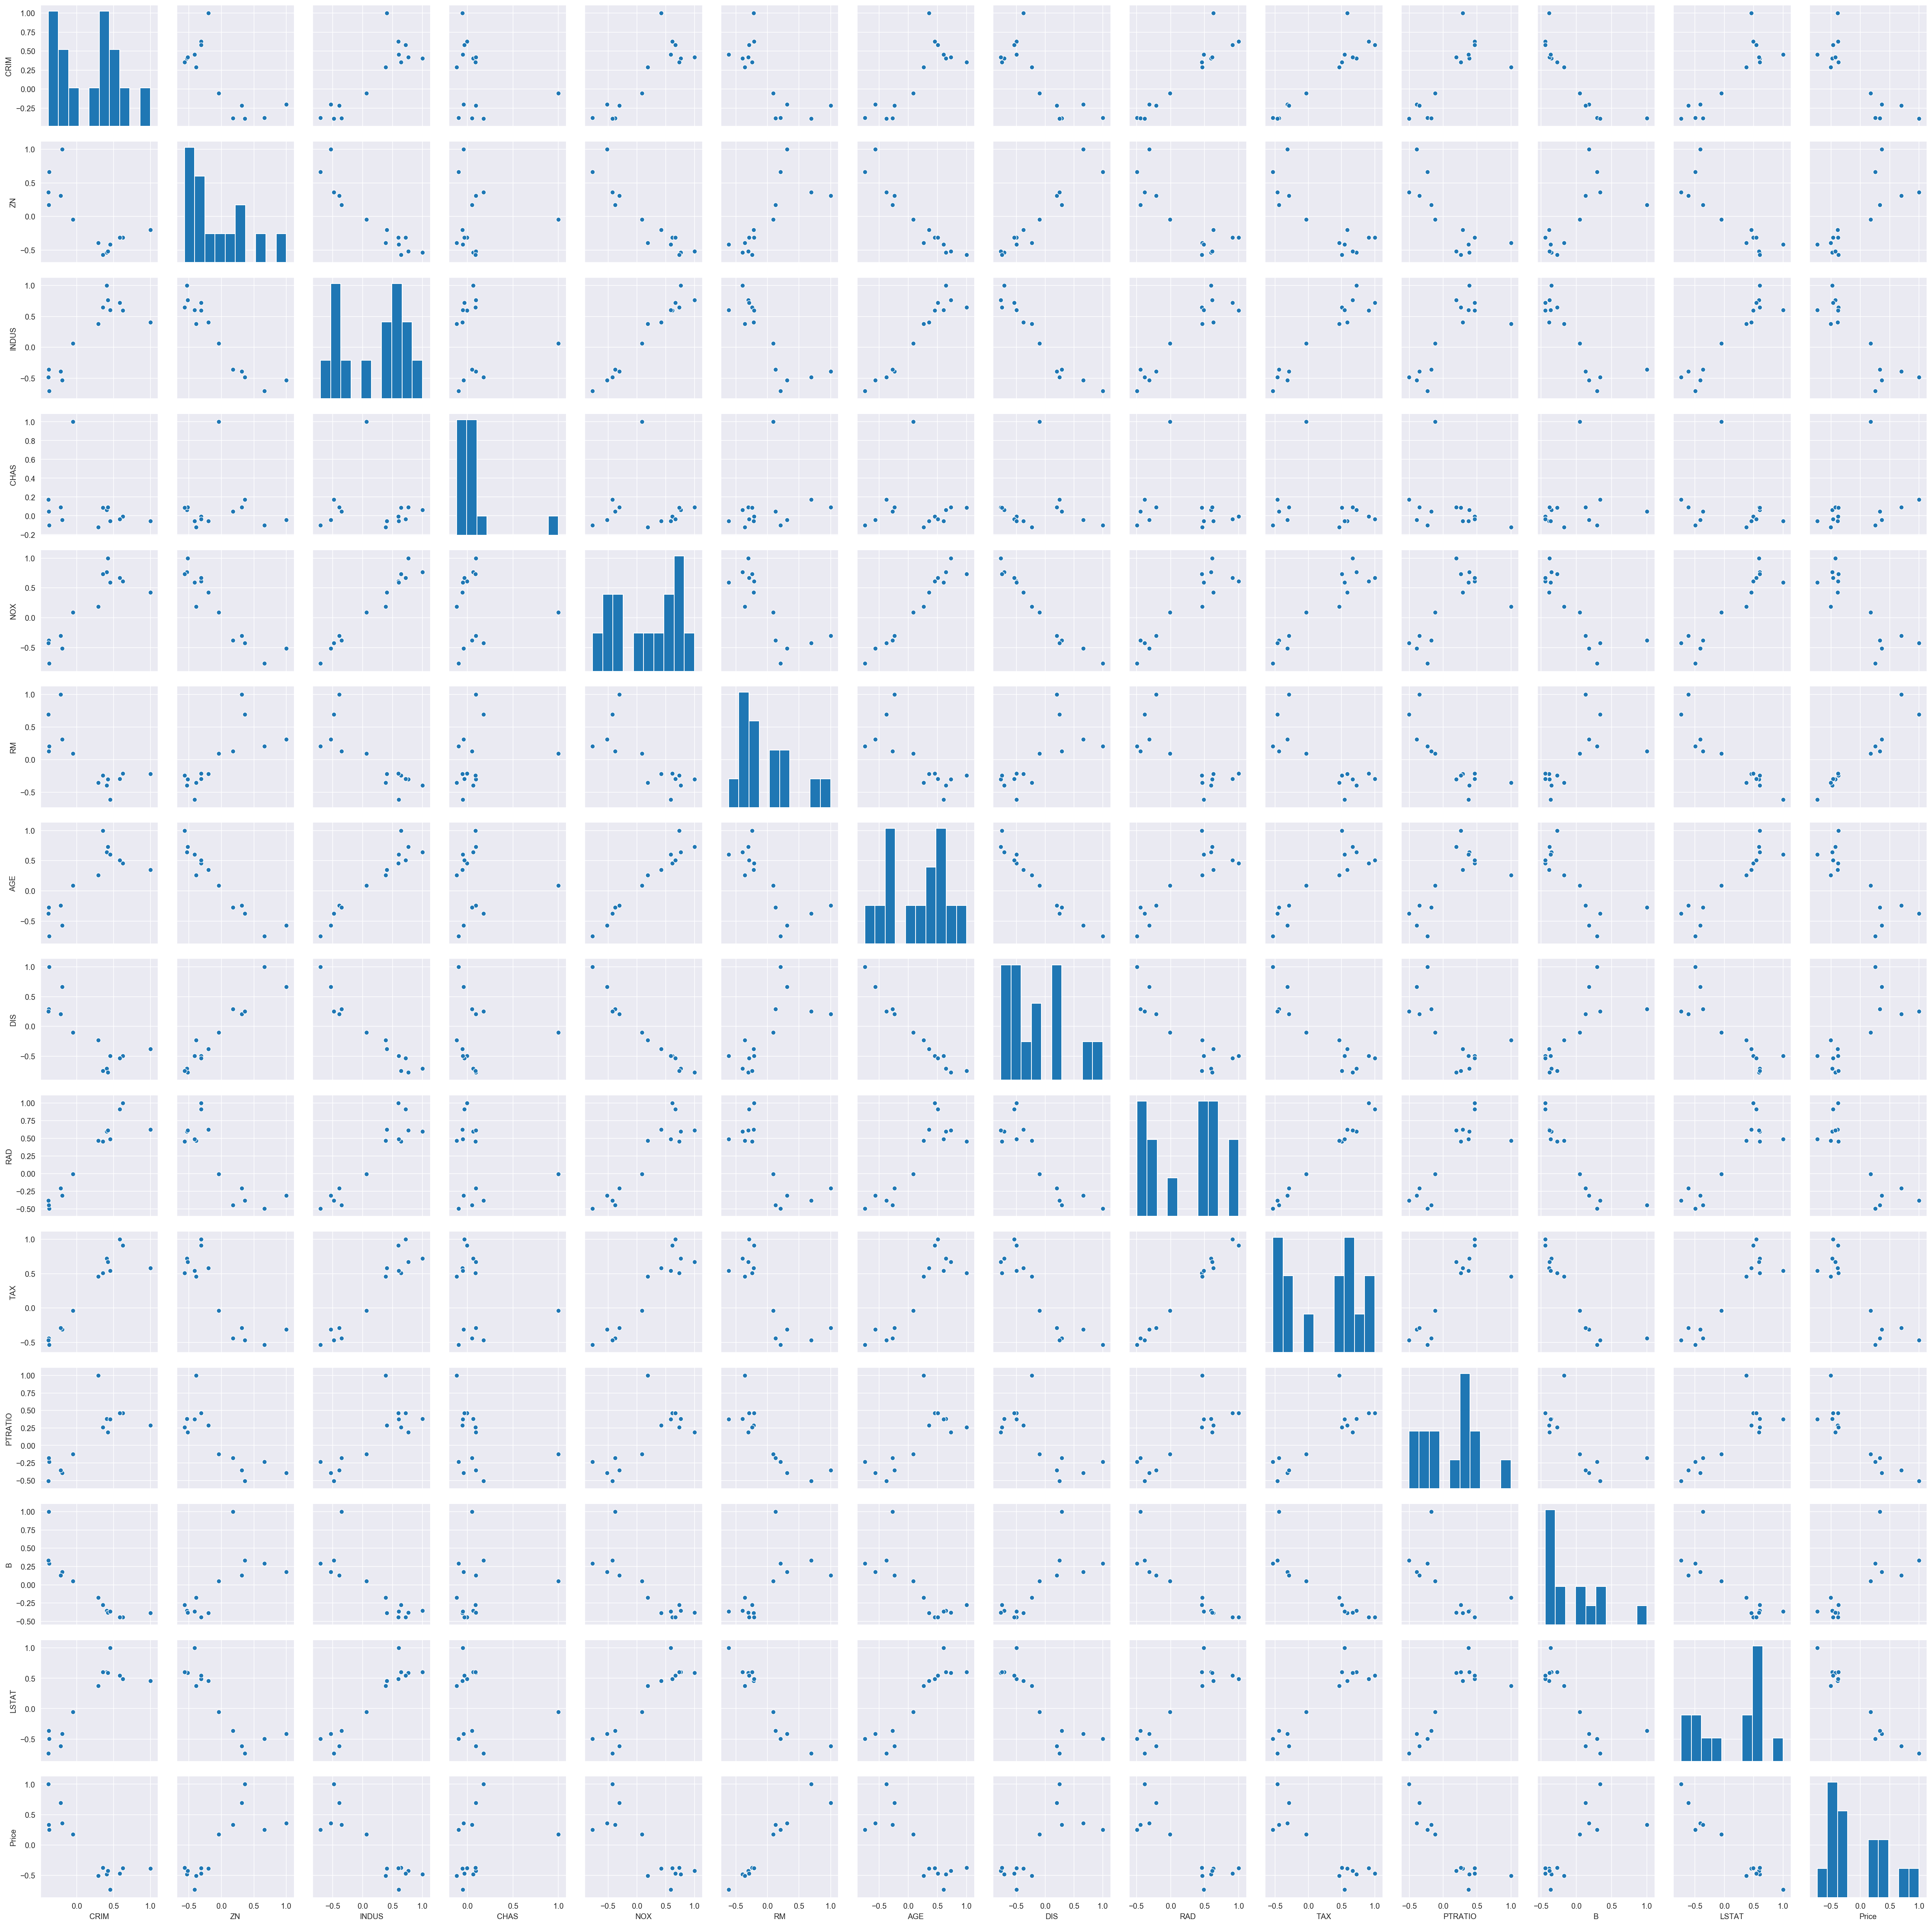

In [32]:
sns.pairplot(bos.corr())

In [33]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [34]:
## 
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
       'PTRATIO', 'B', 'LSTAT']]
y = bos['Price']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-6.14353517e-02  4.15158853e-02 -4.58308446e-02  3.08501553e+00
 -1.45947517e+01  4.13427242e+00 -4.29488865e-03 -1.48885145e+00
 -8.11272030e-01  8.20475285e-03 -5.15811938e-01]
Intercept: 29.210709963719367
R^2 score: 0.7292505252078052


In [35]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     121.0
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          2.00e-132
Time:                        22:37:54   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     494   BIC:                             3094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2107      4.893      5.970      0.000      19.597      38.825
CRIM          -0.0614      0.030     -2.019      0.044      -0.121      -0.002
ZN             0.0415      0.014      3.064      0.002       0.015       0.068
INDUS         -0.0458      0.056     -0.819      0.413      -0.156       0.064
CHAS           3.0850      0.872      3.538      0.000       1.372       4.798
NOX          -14.5948      3.670     -3.977      0.000     -21.806      -7.384
RM             4.1343      0.419      9.859      0.000       3.310       4.958
AGE           -0.0043      0.013     -0.320      0.749      -0.031       0.022
DIS           -1.4889      0.203     -7.322      0.000      -1.888      -1.089
PTRATIO       -0.8113      0.122     -6.669      0.000      -1.050      -0.572
B              0.0082      0.003      3.032      0.003       0.003       0.014
LSTAT         -0.5158      0.052     -9.983      0.000      -0.617      -0.414
==============================================================================
Omnibus:                      193.860   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.429
Skew:                           1.628   Prob(JB):                    7.58e-209
Kurtosis:                       8.904   Cond. No.                     9.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
vif,1.478206,2.154483,3.179166,1.057805,3.901348,1.872532,3.075755,3.954443,1.496077,1.316559,2.936487


In [37]:
## 
X = bos[['CRIM', 'CHAS', 'RM', 
       'PTRATIO', 'B']]
y = bos['Price']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.13917718  2.92717785  7.2667075  -0.99092991  0.01681586]
Intercept: -10.544986213557923
R^2 score: 0.6248440235916861


#### Finally let's check for overfit and underfit condition

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 5)
(152, 5)
(152,)


In [39]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.5659149288699228
R^2 score for test: 0.7319634974837973


In the above  case we can see that the model fits the train data much better than the test data.

In [40]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     166.6
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          5.31e-104
Time:                        22:37:54   Log-Likelihood:                -1592.2
No. Observations:                 506   AIC:                             3196.
Df Residuals:                     500   BIC:                             3222.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.5450      4.069     -2.592      0.010     -18.539      -2.551
CRIM          -0.1392      0.033     -4.226      0.000      -0.204      -0.074
CHAS           2.9272      1.001      2.924      0.004       0.961       4.894
RM             7.2667      0.387     18.753      0.000       6.505       8.028
PTRATIO       -0.9909      0.129     -7.696      0.000      -1.244      -0.738
B              0.0168      0.003      5.605      0.000       0.011       0.023
==============================================================================
Omnibus:                      248.423   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2225.923
Skew:                           1.938   Prob(JB):                         0.00
Kurtosis:                      12.516   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""